In [2]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

Question #1

In [3]:
def matrix_gen(m,n):
    Rm = np.arange(m)
    Rn = np.arange(n)
    return np.array([[(10)*np.random.random() for i in Rn] for j in Rm])

def M_Gram_Schmidt(A):
    m,n = len(A),len(A[0])
    Q = A.copy()
    r1 = list(np.arange(0,n))
    R = np.array([[0.0 for i in r1] for j in r1])
    for i in np.arange(0,n):
        R[i,i] = la.norm(Q[:,i])
        Q[:,i] = Q[:,i] / R[i,i]
        for j in np.arange(i+1,n):
            R[i,j] = np.dot(Q[:,j],Q[:,i])
            Q[:,j] = Q[:,j] - R[i,j]*Q[:,i]
    return A,Q,R

m,n = 100,100
A,Q,R = M_Gram_Schmidt(matrix_gen(m,n))
b = np.array([np.random.random() for i in np.arange(n)])
x = np.array(np.dot(np.dot(np.linalg.inv(R),np.transpose(Q)),b))
print("Solution for x:")
print("Check (Ax - b = 0):")
print(la.norm(np.dot(A,x) - b) < 0.0001)

Solution for x:
Check (Ax - b = 0):
True


Question #2

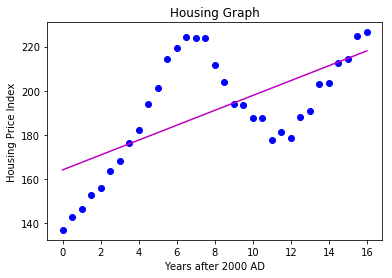

In [4]:
data = np.load("housing.npy")
X = np.array([[1,i] for i in data[:,0]])
A,Q,R = M_Gram_Schmidt(X)

b = np.array([[i] for i in data[:,1]])
xbar = np.array(np.dot(np.dot(np.linalg.inv(R),np.transpose(Q)),b))
plt.plot(data[:,0],data[:,1],'o',color='b')
plt.plot(data[:,0],np.dot(A,xbar),'-',color='m')
plt.title("Housing Graph")
plt.xlabel("Years after 2000 AD")
plt.ylabel("Housing Price Index")
plt.show()

Question #3

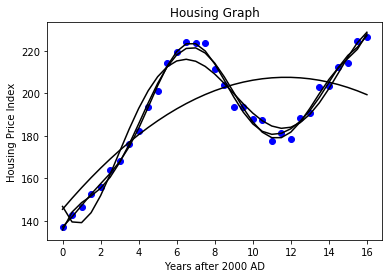

In [5]:
data = np.load("housing.npy")
X3 = np.vander(data[:,0],3)
X6 = np.vander(data[:,0],6)
X9 = np.vander(data[:,0],9)
X12 = np.vander(data[:,0],12)

A3,Q3,R3 = M_Gram_Schmidt(X3)
A6,Q6,R6 = M_Gram_Schmidt(X6)
A9,Q9,R9 = M_Gram_Schmidt(X9)
A12,Q12,R12 = M_Gram_Schmidt(X12)
b = np.array([[i] for i in data[:,1]])

xbar3 = np.array(np.dot(np.dot(np.linalg.inv(R3),np.transpose(Q3)),b))
A6,Q6,R6 = M_Gram_Schmidt(X6)
xbar6 = np.array(np.dot(np.dot(np.linalg.inv(R6),np.transpose(Q6)),b))
A9,Q9,R9 = M_Gram_Schmidt(X9)
xbar9 = np.array(np.dot(np.dot(np.linalg.inv(R9),np.transpose(Q9)),b))
A12,Q12,R12 = M_Gram_Schmidt(X12)
xbar12 = np.array(np.dot(np.dot(np.linalg.inv(R12),np.transpose(Q12)),b))

plt.plot(data[:,0],data[:,1],'o',color='b')
plt.plot(data[:,0],np.dot(A3,xbar3),'-',color='k')
plt.plot(data[:,0],np.dot(A6,xbar6),'-',color='k')
plt.plot(data[:,0],np.dot(A9,xbar9),'-',color='k')
plt.plot(data[:,0],np.dot(A12,xbar12),'-',color='k')
plt.title("Housing Graph")
plt.xlabel("Years after 2000 AD")
plt.ylabel("Housing Price Index")
plt.show()

Question #4

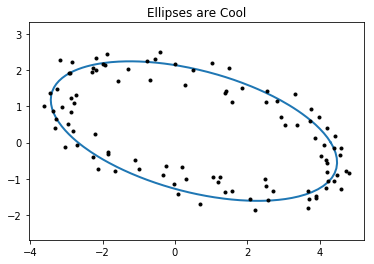

In [6]:
x,y = np.load("ellipse.npy").T
A = np.column_stack((x**2,x,x*y,y,y**2))
b = np.ones_like(x)

a,b,c,d,e = la.lstsq(A,b)[0]

def plot_ellipse(a,b,c,d,e):
    theta = np.linspace(0,2*np.pi,200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t,r*sin_t,lw=2)
    plt.gca().set_aspect("equal","datalim")
    
p = plot_ellipse(a,b,c,d,e)
plt.plot(x,y,'.',color='k')
plt.title("Ellipses are Cool")
plt.show()

Question #5

In [7]:
def powermethod(A):
    m,n = A.shape
    x = 10*np.random.randn(n)
    x = x/la.norm(x)
    e = 0.0001
    i = 0
    xt = x
    while la.norm(xt - x) > e or i < 10000:
        xt = np.dot(A,x)
        xt = xt / la.norm(xt)
        x = xt
        i = i + 1
    return np.dot(np.dot(x,A),x), x

A = matrix_gen(5,5)
sig_m, vec_m = powermethod(A)
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
np.allclose(A @ vec_m,sig_m * vec_m)
print(lamb, x)
print(sig_m, vec_m)

(23.2176857411+0j) [-0.50286146+0.j -0.28166220+0.j -0.67361169+0.j -0.31501155+0.j
 -0.33883887+0.j]
23.2176857411 [ 0.50286146  0.2816622   0.67361169  0.31501155  0.33883887]


Question #6

In [8]:
def Hessenberg(A):
    m,n = len(A),len(A[0])
    H = A.copy()
    Q = np.eye(m)
    for k in np.arange(n-2):
        u = H[k+1:,k].copy()
        u[0] = u[0] + (abs(u[0])/u[0])*la.norm(u)
        u = u / la.norm(u)
        H[k+1:,k:] = H[k+1:,k:] - 2*np.outer(u,np.dot(u,H[k+1:,k:]))
        H[:,k+1:] = H[:,k+1:] - 2*np.outer(np.dot(H[:,k+1:],u),u)
        Q[k+1:,:] = Q[k+1:,:] - 2*np.outer(u,np.dot(u,Q[k+1:,:]))
        return A,H,np.transpose(Q)

def prob6(A):
    m,n = A.shape
    S_store,S,Q = Hessenberg(A)
    test = 1
    k = 0
    while la.norm(S - S_store) > 0.01:
        S_store,Q,R = M_Gram_Schmidt(S)
        S = R @ Q
        print(la.norm(S-S_store))
    eigs = []
    return S

prob6(A)

24.9764790304
21.8330109062
18.6299416305
19.3106927764
20.6160381404
21.3668601477
21.0692549474
21.1269318005
21.3347260325
21.7353363158
21.4062772751
21.1694411068
21.1489558151
21.1293216091
21.1464021333
21.2281685222
21.5936496971
21.5870024764
21.2247481741
21.1464626947
21.1331749106
21.1390316546
21.1821886345
21.4375379918
21.6771839165
21.3077118404
21.1593894698
21.1351367253
21.1350079828
21.1585332188
21.3024120609
21.6751379675
21.4453481386
21.1837411265
21.1392760017
21.1332969138
21.1456807131
21.2220332559
21.5815931716
21.5992825034
21.2299779716
21.1469730423
21.1334131188
21.1385641466
21.1795870448
21.424494341
21.6802841722
21.316999579
21.1608756737
21.1353857295
21.134787674
21.1571527212
21.2937665906
21.6710857947
21.4586865283
21.1865381819
21.1397543679
21.1332396629
21.1449179299
21.2173751288
21.5698094744
21.6096663758
21.2353301803
21.1478382654
21.1335023531
21.1381455554
21.1771489413
21.411685647
21.682726874
21.3267017453
21.1624481437
21.13564497

21.1346628226
21.1355404722
21.1618165601
21.3228145605
21.6818322679
21.4167208497
21.1780980492
21.1383085338
21.1334655513
21.1474909615
21.2331788044
21.6056305367
21.5745272626
21.2191878514
21.1452152424
21.1332608179
21.1395623133
21.1854137934
21.4533934638
21.6727662788
21.2971389233
21.1576903496
21.134872335
21.1352876349
21.1602752928
21.3132751823
21.6791509539
21.4296303734
21.1805876253
21.1387358302
21.1333812684
21.146642244
21.227938394
21.5950128076
21.5861191314
21.223946241
21.1459928399
21.1333228339
21.1390936464
21.182674865
21.4401142337
21.6765661508
21.3059441235
21.1590979643
21.1350969435
21.1350506619
21.1588099298
21.3041455849
21.6758549286
21.4427644192
21.1832126149
21.139185748
21.1333094106
21.1458338241
21.2229711813
21.5838342458
21.5971889191
21.228967176
21.1468091843
21.1333971732
21.1386483386
21.1800776586
21.4270215491
21.6797375114
21.3151556263
21.1605782187
21.1353370622
21.1348291136
21.1574164122
21.2954211725
21.6719268806
21.4560749237

21.2182894493
21.1450679689
21.1332501512
21.139656506
21.1859650891
21.4560002366
21.6719505915
21.2954687557
21.157423998
21.1348303081
21.1353356781
21.1605697475
21.3151030752
21.6797215223
21.4270940199
21.1800917765
21.138650761
21.1333967239
21.1468045167
21.2289383982
21.5971286725
21.5838981087
21.2229981727
21.1458382282
21.1333097774
21.1391831723
21.1831975731
21.4426905735
21.6758750633
21.3041954126
21.1588179058
21.1350519414
21.1350956472
21.1590899097
21.305893854
21.6765467021
21.4401878813
21.1826897517
21.1390961966
21.1333224537
21.1459883939
21.2239189654
21.5860558317
21.5950736701
21.2279668731
21.1466468675
21.1333817042
21.1387333833
21.1805733609
21.4295576527
21.67916761
21.3133272867
21.160283681
21.1352890017
21.134871124
21.1576826894
21.2970909056
21.6727432728
21.4534680104
21.185429494
21.1395649966
21.1332605062
21.1452110075
21.2191620043
21.5744611958
21.6056881444
21.2332088462
21.1474958156
21.1334660569
21.1383062106
21.1780845192
21.4166495065
2

21.6096100974
21.5698765352
21.2174004384
21.1449220854
21.1332399482
21.1397516313
21.1865221511
21.4586117127
21.6711102143
21.2938137409
21.1571602333
21.1347888523
21.1353843279
21.1608671187
21.3169465808
21.6802688457
21.4245665526
21.1796010184
21.1385665452
21.1334126527
21.1469683361
21.2299488895
21.5992228566
21.5816575993
21.2220599888
21.1456850755
21.1332971886
21.1392735932
21.1837257288
21.4452736503
21.6751599474
21.3024621165
21.1585405792
21.1350075258
21.135141222
21.1593726501
21.3076575785
21.6772145741
21.4376184429
21.1821722777
21.1390075334
21.1333359653
21.1461444363
21.2248767286
21.5882575563
21.5929370639
21.2269769602
21.1464860831
21.1333667076
21.1388192877
21.1810742093
21.4321023207
21.6785743421
21.3115145376
21.1599920296
21.1352415444
21.1349137083
21.1579515801
21.298775847
21.673535098
21.4508662008
21.1848837387
21.1394717027
21.133271624
21.1453596439
21.2200696199
21.5767605905
21.6036644684
21.2321645888
21.147327014
21.1334486264
21.13838777

21.1701751306
21.1369497656
21.133872299
21.1508974821
21.2544197172
21.6385245503
21.5295640746
21.2040912677
21.1427189808
21.133138332
21.1414500233
21.1965290867
21.501682674
21.6537266196
21.268794659
21.1531841825
21.1341885489
21.1362710086
21.1661837705
21.3493770057
21.6860227202
21.3846737396
21.1722380019
21.1373027649
21.1337421009
21.149886501
21.2480875671
21.6302046003
21.5425439962
21.2080127557
21.1433720012
21.1331569044
21.1408891392
21.1932106196
21.4881993644
21.6599115355
21.276209135
21.1543615404
21.1343607441
21.1359748865
21.1644256182
21.3387774135
21.684861534
21.3968209002
21.1744112815
21.1376754979
21.1336249616
21.148923792
21.2420777412
21.6212110302
21.5552199624
21.2121519168
21.1440576785
21.1331875121
21.1403554122
21.1900657755
21.474692943
21.665413683
21.2839985953
21.1555987243
21.1345471035
21.1356959223
21.1627550928
21.3285858857
21.6831223575
21.4092901229
21.1767014294
21.1380687052
21.1335206744
21.148006951
21.2363764689
21.611564789
21.5

21.4363615401
21.6775332916
21.3085278603
21.1595122742
21.1351637803
21.1349859654
21.1584056155
21.3016180259
21.6748005621
21.4465422891
21.1839866531
21.1393182491
21.1332911877
21.1456105247
21.221603647
21.5805522433
21.6002414637
21.2304481203
21.1470492143
21.1334206348
21.1385255701
21.1793622781
21.423330865
21.6805287048
21.3178560251
21.161013973
21.1354083999
21.1347687372
21.1570318655
21.2930079255
21.6706891824
21.459893519
21.1867973635
21.1397986072
21.1332351155
21.1448510732
21.2169680234
21.5687261105
21.6105712891
21.2358260691
21.1479182315
21.1335110029
21.1381089403
21.1769357251
21.4105460029
21.6829174548
21.3275952561
21.1625936388
21.1356691091
21.1345664151
21.1557250993
21.2847938166
21.6659237389
21.4733515609
21.1897622831
21.1403037968
21.1331912142
21.1441276815
21.2125757166
21.5564608356
21.6202809503
21.2414974238
21.1488306389
21.1336140229
21.1377136555
21.1746335922
21.3980464798
21.6847146975
21.3377459808
21.1642557184
21.1359463971
21.1343786

21.5193976507
21.6444678974
21.2595277315
21.1517110783
21.1339816823
21.1366907688
21.16865696
21.3640371424
21.686685138
21.3691208706
21.1695274515
21.136839174
21.1339174622
21.1512368625
21.2565493183
21.6410810861
21.5252916312
21.2028617335
21.1425135348
21.1331348814
21.1416383566
21.1976466122
21.5060485939
21.6515681393
21.2664637678
21.1528139051
21.1341355833
21.1363710346
21.1667748645
21.3529086119
21.6862772008
21.3808000331
21.1715557691
21.1371859116
21.1337829717
21.1502096502
21.2501094713
21.6329832233
21.53835562
21.2067149793
21.1431562634
21.1331495503
21.141068388
21.1942695893
21.4925871177
21.6579768195
21.2737588852
21.1539724957
21.1343032434
21.1360692163
21.1649871604
21.3421777428
21.6853018181
21.3928363552
21.1736924763
21.1375521523
21.1336616122
21.1492315239
21.2439963973
21.624206674
21.5511377935
21.2107821064
21.1438311602
21.1331762418
21.1405259641
21.1910693851
21.4790810149
21.6636997423
21.2814252363
21.1551898849
21.1344849637
21.1357847357


21.6675452204
21.4689696028
21.188781241
21.1401368244
21.133204152
21.1443589303
21.2139772811
21.5604914391
21.6171953763
21.2396212315
21.1485292161
21.1335791435
21.1378398299
21.1753685587
21.4020752948
21.6841946545
21.3344020078
21.1637062259
21.1358544298
21.1344380862
21.1548791082
21.2794685312
21.6623294386
21.4824662606
21.1918553021
21.1406593762
21.1331684217
21.1436589255
21.2097421466
21.5479647272
21.6264689741
21.2454984214
21.1494721736
21.1336908045
21.1374585008
21.1731464913
21.3897877773
21.6855998692
21.3448290575
21.1654265897
21.1361432031
21.1342599191
21.1536767495
21.2718963044
21.6564354938
21.4959674193
21.1950988907
21.1412085904
21.1331447466
21.1429922307
21.2057297111
21.535105515
21.6350768457
21.2516921015
21.1504623647
21.1338154336
21.1370972139
21.1710375275
21.3778387757
21.6864325176
21.3556605495
21.1672374522
21.1364494553
21.1340957344
21.1525324112
21.2646923478
21.6498538349
21.5094071676
21.1985217975
21.1417856535
21.1331330859
21.142357

21.6731726339
21.4520665432
21.185134956
21.1395146529
21.1332664342
21.1452908577
21.2196494775
21.575701421
21.6046014365
21.2326452722
21.1474047342
21.133456613
21.1383500216
21.1783396791
21.417992819
21.6815927769
21.3218478834
21.1616598332
21.1355146158
21.1346829844
21.1564816237
21.2895514334
21.6687918165
21.4654690565
21.188008604
21.1400051906
21.1332154236
21.1445465814
21.2151163707
21.5636857698
21.6146780529
21.2381433197
21.1482914948
21.1335522113
21.1379423498
21.1759656234
21.4053219114
21.6837343416
21.3317580176
21.1632731458
21.1357821439
21.1344867383
21.1552016089
21.2814990438
21.6637502782
21.4789541479
21.1910401323
21.1405209958
21.1331765496
21.1438376569
21.2108213607
21.5512563066
21.6241210689
21.2439404819
21.1492225611
21.1336605338
21.1375556871
21.1737130803
21.3929510305
21.685289946
21.3420788616
21.1649707991
21.1360664644
21.1343048844
21.1539836523
21.2738291509
21.658033753
21.4924603561
21.1942387222
21.1410631667
21.133149745
21.1431624508


21.1544704033
21.1343769337
21.135949082
21.164271736
21.3378432724
21.6847288172
21.3979305342
21.1746125355
21.1377100411
21.1336150511
21.148839422
21.2415521303
21.6203691129
21.5563437388
21.2125355726
21.1441210521
21.1331908592
21.1403086632
21.1897908922
21.4734782946
21.6658758249
21.2847185094
21.1557131309
21.1345645841
21.1356716357
21.1626088604
21.3276886907
21.6829370666
21.4104272082
21.176913533
21.1381051294
21.1335119114
21.1479265966
21.2358779544
21.610665432
21.56861285
21.2169256536
21.1448441132
21.1332346467
21.1398032354
21.1868244823
21.4600195254
21.6706474886
21.29292894
21.1570192849
21.134766768
21.1354107732
21.1610284415
21.3179455916
21.6805539398
21.4232095648
21.1793388841
21.1385215547
21.1334214252
21.1470571818
21.2304973135
21.6003412672
21.5804433831
21.2215589325
21.1456032178
21.1332906041
21.1393226488
21.1840123637
21.4466670286
21.6747649343
21.301535283
21.1583923886
21.1349838544
21.1351660046
21.1595260303
21.308613577
21.6775643017
21.4

21.1818548934
21.4360329687
21.6776157441
21.3087561876
21.1595489185
21.1351697063
21.1349803472
21.1583704085
21.3013977757
21.6747055675
21.4468744792
21.1840551442
21.1393299693
21.1332896361
21.1455910753
21.2214846305
21.5802622717
21.6005071082
21.2305791672
21.1470704385
21.1334227421
21.1385148823
21.1793000098
21.4230079131
21.6805957825
21.3180946046
21.1610525153
21.1354147226
21.1347634965
21.1569983787
21.292797679
21.6705780318
21.4602290717
21.1868696059
21.139810936
21.1332338694
21.1448325471
21.2168552479
21.5684244329
21.610821853
21.2359642875
21.1479405147
21.1335134246
21.1380987965
21.176876656
21.4102297304
21.6829695621
21.3278441358
21.1626341871
21.1356758404
21.1345615424
21.1556932419
21.284593363
21.665796022
21.4736890384
21.1898384958
21.1403167602
21.1331902714
21.1441100354
21.2124688656
21.5561489548
21.620515584
21.2416431573
21.1488540356
21.1336167634
21.1377040352
21.1745775452
21.3977378004
21.6847521826
21.3380051302
21.1642983874
21.1359535497

21.1618402387
21.3229605376
21.681867833
21.4165294629
21.1780617587
21.1383023025
21.1334669086
21.1475039874
21.2332594232
21.605785049
21.5743499801
21.2191185241
21.1452038831
21.1332599823
21.1395695139
21.1854559268
21.4535934733
21.6727045109
21.2970101253
21.1576698029
21.1348690872
21.135291303
21.1602978026
21.3134150013
21.6791955972
21.4294352881
21.1805493651
21.138729267
21.1333824385
21.1466546512
21.2280148193
21.5951760553
21.5859492688
21.223873082
21.1459809146
21.1333218147
21.1391004899
21.1827148143
21.4403118349
21.676513928
21.3058092849
21.1590763599
21.1350934667
21.1350540957
21.1588313335
21.3042792953
21.6759089032
21.4425663122
21.1831722695
21.1391788393
21.1333103956
21.1458456424
21.2230436144
21.5840055466
21.5970272445
21.2288899878
21.1467966646
21.1333959685
21.1386548392
21.1801155446
21.4272159965
21.6796945716
21.3150146668
21.1605554968
21.13533335
21.1348323195
21.1574367688
21.2955488609
21.6719904487
21.4558745556
21.1859384011
21.1396519474


21.1336966526
21.1495199409
21.2457967246
21.6269098228
21.5473369938
21.2095388832
21.1436252351
21.1331669701
21.1406858612
21.1920114135
21.4831333727
21.6620544083
21.2790857913
21.1548183261
21.1344289553
21.1358682877
21.16378913
21.3349073051
21.6842776239
21.4014610224
21.1752560786
21.137820518
21.133584356
21.1485747072
21.2399042299
21.6176685929
21.55988168
21.2137627389
21.144323558
21.1332021039
21.1401620195
21.1889292034
21.4696349939
21.6673033888
21.2870187253
21.1560787843
21.134620712
21.1355956199
21.1621502246
21.3248698527
21.6823187266
21.4140427996
21.177591799
21.1382216044
21.1334848401
21.1476744772
21.2343151145
21.6077846642
21.5720319518
21.2182208465
21.1450567167
21.1332493512
21.1396637779
21.1860076631
21.456200622
21.6718869321
21.2953411234
21.157403651
21.1348271044
21.1353393926
21.1605924801
21.3152440925
21.6797643761
21.4268996054
21.1800539092
21.1386442635
21.1333979303
21.1468170421
21.2290156253
21.597290267
21.5837267359
21.2229257763
21.1

21.4640570733
21.1876996478
21.1399525222
21.1332202074
21.14462303
21.2155808814
21.5649677602
21.6136493809
21.2375522863
21.1481963542
21.1335415801
21.1379841488
21.1762090375
21.4066386793
21.6835372592
21.3306982515
21.1630998891
21.1357532773
21.1345066593
21.1553330193
21.2823262803
21.66431106
21.4775363114
21.1907141778
21.1404656243
21.1331800628
21.1439104725
21.2112614589
21.5525787993
21.6231603069
21.2433173979
21.1491226632
21.1336485582
21.1375953177
21.17394406
21.39423473
21.6851538007
21.3409761213
21.1647884651
21.13603581
21.1343233103
21.1541087027
21.2746167347
21.6586659739
21.4910433063
21.1938947829
21.1410049735
21.1331519936
21.1432318003
21.2071691234
21.539833197
21.6320134692
21.2493939688
21.1500953342
21.1337684299
21.1372268009
21.1717945585
21.3821590817
21.6861944795
21.3516608835
21.1665657071
21.1363356167
21.1341540579
21.1529435441
21.2672797553
21.6523361259
21.5045132804
21.1972510761
21.14157173
21.1331359513
21.1425854671
21.203291998
21.526

21.1393722705
21.1332841157
21.1455212785
21.2210576489
21.5792161926
21.6014600554
21.2310522165
21.1471470321
21.1334303905
21.1384765348
21.179076605
21.4218469928
21.6808340386
21.3189553093
21.1611916219
21.1354375597
21.134744714
21.1568782158
21.2920431143
21.6701746441
21.4614371649
21.1871303849
21.1398554325
21.133229448
21.1447660633
21.2164506596
21.5673365259
21.6117203341
21.2364632157
21.1480209303
21.1335222054
21.1380624023
21.1766647267
21.4090930502
21.6831540229
21.3287419096
21.1627805358
21.1357001503
21.1345440821
21.1555789243
21.283873992
21.6653329373
21.4749037481
21.1901136093
21.1403635456
21.1331869413
21.14404671
21.2120855333
21.5550246539
21.621356584
21.2421692012
21.14893847
21.1336266919
21.1376695207
21.1743764557
21.3966286182
21.6848840867
21.3389398458
21.1644523926
21.1359793783
21.1343579466
21.1543426995
21.2760904747
21.6598202075
21.4884103101
21.1932610909
21.1408976879
21.1331565219
21.1433615545
21.2079498628
21.5423434219
21.6303397726
2

21.1545789687
21.2775784695
21.66094846
21.4857764052
21.192634005
21.1407914354
21.1331615077
21.1434925493
21.2087388707
21.5448421227
21.6286404278
21.2469862076
21.1497103304
21.1337201338
21.1373681519
21.1726195334
21.3868276772
21.6858565335
21.3474458988
21.1658617247
21.136216603
21.1342184088
21.1533911127
21.270097575
21.654886716
21.4992687231
21.1959206062
21.1413473606
21.1331407794
21.142833782
21.2047791976
21.5319117163
21.63708239
21.2532595312
21.1507124688
21.1338479731
21.1370116653
21.1705373159
21.3749655195
21.6865500124
21.3583751922
21.1676955476
21.1365272262
21.1340576041
21.1522605279
21.2629819973
21.6481356575
21.5126830761
21.1993889992
21.1419314368
21.1331320585
21.1422064561
21.2010277192
21.5187336095
21.6448395393
21.2598663673
21.1517649664
21.1339890586
21.1366743392
21.1685604832
21.3634711763
21.6866781479
21.3696962952
21.1696264352
21.1368560666
21.1339104188
21.1511842708
21.2562191939
21.6406923131
21.5259507829
21.2030495853
21.1425449452
2

21.1333087519
21.1458259073
21.2229226624
21.5837193593
21.5972972174
21.2290189497
21.1468175813
21.1333979823
21.1386439841
21.1800522805
21.426891241
21.679766217
21.3152501624
21.1605934587
21.1353395525
21.1348269666
21.1574027758
21.2953356335
21.6718841896
21.4562092451
21.1860094958
21.139664091
21.1332493169
21.1450562327
21.2182178958
21.5720242631
21.6077912334
21.2343186211
21.1476750433
21.1334849002
21.1382213391
21.1775902541
21.4140345999
21.682320179
21.3248761878
21.162151254
21.1355957902
21.1346205837
21.1560779517
21.2870134893
21.6673002224
21.4696436775
21.1889311368
21.1401623487
21.1332020773
21.144323097
21.2137599432
21.559873717
21.6176747575
21.2399079276
21.1485753015
21.1335844242
21.1378202663
21.1752546128
21.4014530119
21.6842786972
21.3349139052
21.1637902131
21.1358684688
21.1344288364
21.1548175339
21.2790808031
21.6620508085
21.4831420777
21.1920134533
21.1406862073
21.1331669514
21.143624796
21.2095362344
21.5473287973
21.6269155646
21.2458006222


21.1341083576
21.1526218654
21.2652552142
21.650405637
21.5083361944
21.1982412184
21.1417384498
21.133133577
21.1424069732
21.2022247886
21.5230393618
21.6423941727
21.2576817649
21.1514172239
21.1339417386
21.1367819083
21.1691917485
21.367165265
21.6866983651
21.3659748477
21.1689879193
21.1367471584
21.1339567761
21.1515282638
21.2583791781
21.6431872311
21.5216591728
21.2018381715
21.1423422475
21.1331329515
21.1418000734
21.1986075301
21.5097333276
21.6496848215
21.2645212965
21.1525052247
21.1340919056
21.1364571411
21.167282752
21.3559294659
21.6864457231
21.3775520438
21.1709874948
21.1370886542
21.1338186342
21.1504871037
21.2518470942
21.6352781388
21.534788581
21.2056346165
21.1429763876
21.1331443198
21.1412223162
21.1951801274
21.4962959207
21.6562833168
21.2717164302
21.1536481872
21.1342557533
21.1361504557
21.1654696202
21.3450882206
21.6856269314
21.3894924723
21.173093782
21.1374494617
21.1336936864
21.1494957312
21.2456455302
21.6266867254
21.547655057
21.2096417733

21.1975621409
21.1416241307
21.1331350962
21.1425288258
21.2029531764
21.5256127837
21.6408919228
21.256388402
21.1512112279
21.1339140271
21.1368473968
21.1695756364
21.369401053
21.6866819093
21.3637613289
21.1686099331
21.1366827599
21.1339852712
21.1517373117
21.2596925792
21.6446491476
21.5190742397
21.2011214595
21.1422221698
21.1331321323
21.1419160892
21.1992976553
21.5123404462
21.6483175198
21.2631600942
21.1522888436
21.1340615583
21.1365190316
21.1676473082
21.3580898315
21.6865393002
21.3752653509
21.1705893957
21.1370205691
21.1338445287
21.150686139
21.2530944684
21.6368743129
21.5322468581
21.2048781385
21.1428502845
21.133141161
21.1413327509
21.1958340544
21.4989232409
21.65505083
21.270284891
21.1534208602
21.1342227162
21.1362088678
21.1658159043
21.3471707501
21.6858312647
21.3871366678
21.1726743965
21.1373775564
21.1337170261
21.1496852587
21.2468295229
21.6284149358
21.5451700019
21.2088433037
21.1435098777
21.1331621978
21.1407775318
21.1925519849
21.4854298103

21.1337552332
21.1372645577
21.1720149935
21.3834106096
21.6861120141
21.3505202188
21.1663748063
21.1363033129
21.134171174
21.1530631825
21.2680328833
21.6530330786
21.5031028462
21.1968901619
21.1415109048
21.1331370715
21.1426518477
21.2036892739
21.528178052
21.6393634537
21.2551079674
21.1510071947
21.1338868236
21.1369136016
21.1699634228
21.3716511881
21.6866440092
21.361562466
21.1682357381
21.1366190654
21.1340142792
21.1519483735
21.2610191581
21.6460847505
21.5164824631
21.2004122504
21.1421032355
21.1331317692
21.1420332226
21.1999950765
21.5149420591
21.6469238748
21.2618123202
21.1520745304
21.1340317292
21.1365816141
21.1680155488
21.360265122
21.6866113906
21.37299264
21.1701953085
21.1369532131
21.1338709265
21.1508870862
21.2543545117
21.6384444347
21.5296956456
21.2041295865
21.1427253781
21.1331384587
21.1414442546
21.1964948824
21.5015476691
21.653792122
21.2688672571
21.1531957134
21.134190208
21.1362679492
21.1661656713
21.349268605
21.6860139049
21.3847939717
2

KeyboardInterrupt: 